# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [42]:
import pandas as pd
import matplotlib

## Read in the file `craftcans.csv`, and look at the first first rows

In [137]:
df = pd.read_csv("craftcans.csv",na_values=['Does not apply','NaN'])

## How many rows do you have in the data? What are the column types?

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.3+ KB


In [5]:
df.shape

(2416, 7)

In [6]:
df.value_counts()

Beer                                    Brewery                          Location        Style                                Size    ABV    IBUs          
Nonstop Hef Hop                         Hopworks Urban Brewery           Portland, OR    American Pale Wheat Ale              16 oz.  3.90%  20                12
1327 Pod's ESB                          Blue Blood Brewing Company       Lincoln, NE     Extra Special / Strong Bitter (ESB)  12 oz.  5.60%  37                 3
Dale's Pale Ale                         Oskar Blues Brewery              Longmont, CO    American Pale Ale (APA)              12 oz.  6.50%  65                 3
Dagger Falls IPA                        Sockeye Brewing Company          Boise, ID       American IPA                         12 oz.  6.30%  100                3
Heady Topper                            The Alchemist                    Waterbury, VT   American Double / Imperial IPA       16 oz.  8.00%  120                2
                                  

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [9]:
df['Brewery'].value_counts()

Brewery
Brewery Vivant                   62
Oskar Blues Brewery              46
Sun King Brewing Company         38
Cigar City Brewing Company       25
Sixpoint Craft Ales              24
                                 ..
Southampton Publick House         1
Ozark Beer Company                1
Mountain Town Brewing Company     1
Seabright Brewery                 1
Sleeping Lady Brewing Company     1
Name: count, Length: 551, dtype: int64

## What is the most common ABV? (alcohol by volume)

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [21]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [30]:
#df['ABV'] = df['ABV'].str.replace("%").astype("")
df['ABV'] = df['ABV'].str.replace('%','').str.strip()

In [31]:
df['ABV'] #omg yessss

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [39]:
##FLOATTTTTTTTT WOOHOOO
df['ABV'] = df['ABV'].astype(float)
df['ABV']

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [48]:
dog = df['ABV'].mean()
cat = df['ABV'].median()
group = pd.Series({'Mean': dog, 'Median': cat})

<Axes: >

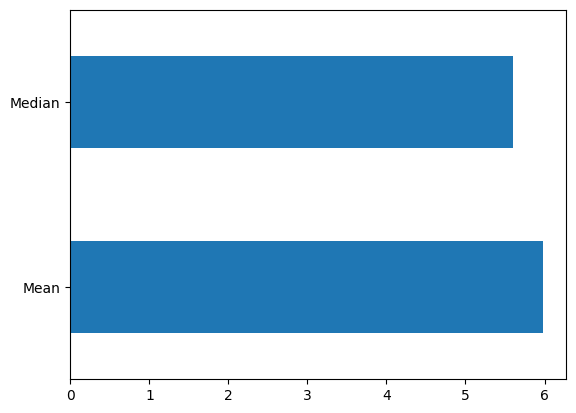

In [49]:
group.plot(kind='barh')
#Ok dumb bar graf 

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [56]:
df['ABV'].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [61]:
df['Location'].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [73]:
Brooklyn_Beer = df[df['Location'] == 'Brooklyn, NY'][['Brewery','Beer']]
Brooklyn_Beer

,Brewery,Beer
115,Sixpoint Craft Ales,4Beans
210,Sixpoint Craft Ales,Jammer
246,Sixpoint Craft Ales,Abigale
404,Evil Twin Brewing,Nomader Weiss
421,Sixpoint Craft Ales,Rad
439,Evil Twin Brewing,Molotov Lite
588,Sixpoint Craft Ales,Bengali
713,Sixpoint Craft Ales,Sensi Harvest
969,Sixpoint Craft Ales,Hi-Res
987,KelSo Beer Company,KelSo Nut Brown Lager


## What brewery in Brooklyn puts out the most different cans of beer?

In [74]:
Brooklyn_Beer['Brewery'].value_counts()

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [85]:
six_point = df[df['Brewery'] == 'Sixpoint Craft Ales']['Style'].value_counts().head(5)
six_point

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [108]:
null_bad = df.dropna(subset=['Location'])
nyc = null_bad[null_bad['Location'].str.contains('NY')]['Brewery']
nyc

115         Sixpoint Craft Ales
210         Sixpoint Craft Ales
246         Sixpoint Craft Ales
404           Evil Twin Brewing
421         Sixpoint Craft Ales
                 ...           
2351           Brooklyn Brewery
2364    Butternuts Beer and Ale
2365    Butternuts Beer and Ale
2366    Butternuts Beer and Ale
2367    Butternuts Beer and Ale
Name: Brewery, Length: 74, dtype: object

### Now *count* all of the breweries in New York state

In [110]:
nyc.value_counts().sum()

np.int64(74)

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [157]:
IPA = df[df['Beer'].str.contains('IPA')]
IPA

,Beer,Brewery,Location,Style,Size,ABV,IBUs
48,Titan IPA,Great Divide Brewing Company,"Denver, CO",American IPA,12 oz.,7.10%,NaN
61,Grapefruit IPA,Perrin Brewing Company,"Comstock Park, MI",American IPA,12 oz.,5.00%,35.0
92,Linnaeus Mango IPA,Brewery Vivant,"Grand Rapids, MI",American IPA,16 oz.,6.00%,NaN
104,Galaxy IPA,Big Muddy Brewing,"Murphysboro, IL",American IPA,16 oz.,7.50%,60.0
107,Mosaic Single Hop IPA,Lost Nation Brewing,"East Fairfield, VT",American IPA,16 oz.,5.50%,NaN
...,...,...,...,...,...,...,...
2382,Caldera IPA,Caldera Brewing Company,"Ashland, OR",American IPA,12 oz.,6.10%,94.0
2387,Big Swell IPA,Maui Brewing Company,"Lahaina, HI",American IPA,12 oz.,6.20%,65.0
2394,113 IPA,Sly Fox Brewing Company,"Pottstown, PA",American IPA,12 oz.,7.00%,113.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00%,65.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [123]:
IBU = df['IBUs'].mean()
IBU

np.float64(42.71316725978647)

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

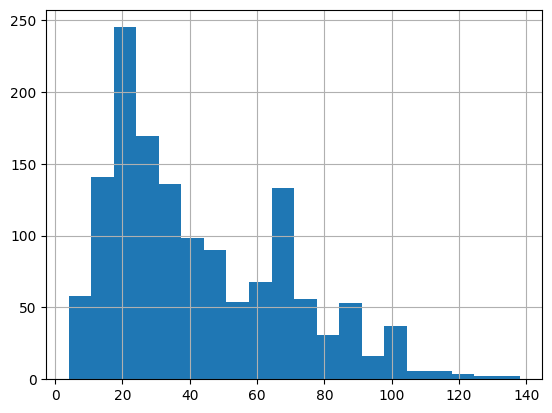

In [125]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [128]:
percentile = df['IBUs'].quantile(0.75)
percentile

np.float64(64.0)

## List all of the beers with IBUs below the 25th percentile

In [130]:
percentile_2 = df['IBUs'].quantile(0.25)
yip_yip = df[df['IBUs'] < percentile_2]
yip_yip

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.00%,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.50%,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.00%,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.20%,18.0
...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.00%,20.0
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.50%,18.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.60%,11.0
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.10%,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [144]:
ibus = df.dropna(subset=['Style','IBUs'])
ibu_2 = ibus.groupby('Style')['IBUs'].median()
ibu_2

Style
Abbey Single Ale              22.0
Altbier                       36.5
American Adjunct Lager         9.0
American Amber / Red Ale      31.0
American Amber / Red Lager    23.0
                              ... 
Tripel                        27.5
Vienna Lager                  23.5
Wheat Ale                     24.0
Winter Warmer                 22.0
Witbier                       15.5
Name: IBUs, Length: 90, dtype: float64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.3+ KB


## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [146]:
#ibus = df.dropna(subset=['Style','IBUs'])
highibu = ibus['IBUs'].quantile(0.75)
high_ibu = ibus[ibus['IBUs']>highibu]
high_ibu

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.20%,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00%,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.90%,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85.0


In [147]:
lowibu = ibus['IBUs'].quantile(0.25)
low_ibu = ibus[ibus['IBUs']<lowibu]
low_ibu

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.00%,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.50%,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.00%,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.20%,18.0
...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.00%,20.0
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.50%,18.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.60%,11.0
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.10%,20.0


## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [152]:
beers = ['Witbier','Hefeweizen','American Pale Wheat Ale']
all_beers=df[df['Style'].isin(beers)]
median_beers=all_beers.groupby('Style')['IBUs'].mean()
median_beers

Style
American Pale Wheat Ale    20.688525
Hefeweizen                 17.592593
Witbier                    16.208333
Name: IBUs, dtype: float64

## Draw a histogram of the IBUs of those beers

<Axes: >

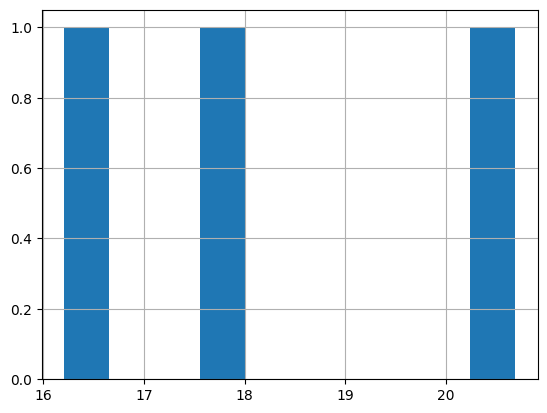

In [153]:
median_beers.hist()
#I feel like this is a super 
#unhelpful histogram hahaha
#I don't know what to change though!

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [161]:
#code from up top to base it off of: IPA = df[df['Beer'].str.contains('IPA')]
IPA_IBU=df[df['Style'].str.contains('IPA', na=False)]
okie_new = IPA_IBU.groupby('Style')['IBUs'].mean()
okie_new
#The numbers feel,, weird. But i don't know where I went wrong.

Style
American Double / Imperial IPA    93.320000
American IPA                      67.634551
American White IPA                48.833333
Belgian IPA                       57.000000
English India Pale Ale (IPA)      54.714286
Name: IBUs, dtype: float64

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

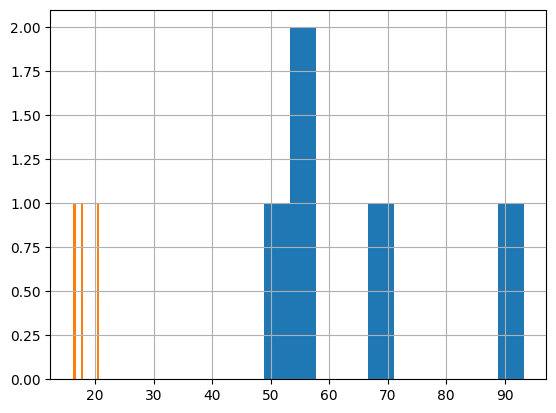

In [162]:
okie_new.hist() 
median_beers.hist()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [167]:
#beers = ['Witbier','Hefeweizen','American Pale Wheat Ale']
#all_beers=df[df['Style'].isin(beers)]
#median_beers=all_beers.groupby('Style')['IBUs'].mean()
drop=df.dropna(subset=['ABV'])
beers = ['Witbier','Hefeweizen','American Pale Wheat Ale']
all_beers=drop[drop['Style'].isin(beers)]
IPA_IBU=drop[drop['Style'].str.contains('IPA', na=False)]
all_beers['ABV'] = all_beers['ABV'].replace('%', '')
IPA_IBU['ABV'] = IPA_IBU['ABV'].replace('%', '')
wheatbeers = all_beers['ABV'].mean()
ipabeers = IPA_IBU ['ABV'].mean()
#This one is hard to wrap my brain around

/var/folders/vt/pkjvr6656lv0kkp6hgt8rwvr0000gn/T/ipykernel_86479/902975301.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_beers['ABV'] = all_beers['ABV'].replace('%', '')
/var/folders/vt/pkjvr6656lv0kkp6hgt8rwvr0000gn/T/ipykernel_86479/902975301.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IPA_IBU['ABV'] = IPA_IBU['ABV'].replace('%', '')


TypeError: Could not convert string '4.70%6.10%5.50%4.50%5.70%5.20%4.50%6.00%4.20%6.50%5.80%4.50%6.50%4.80%5.70%5.10%5.00%3.90%3.90%3.90%3.90%3.90%3.90%3.90%3.90%3.90%3.90%3.90%3.90%5.60%5.10%4.50%5.20%5.90%4.80%5.80%6.10%4.60%4.20%4.70%5.00%6.80%4.30%6.00%5.00%5.00%5.00%6.00%5.00%5.80%4.50%4.20%5.20%4.50%5.00%5.90%5.00%4.80%5.00%5.00%4.70%4.90%4.90%4.20%5.50%5.40%7.00%7.90%4.70%5.40%4.70%5.00%5.20%4.80%5.70%5.00%5.50%5.50%5.00%4.20%4.70%4.60%5.00%4.70%4.50%4.80%6.00%5.00%5.00%6.00%5.00%4.80%5.30%5.20%5.00%3.70%4.80%5.20%4.70%6.20%5.90%4.00%5.00%5.60%4.60%4.80%5.30%4.60%5.50%6.00%6.10%4.50%4.20%5.00%5.50%4.70%4.70%4.70%4.70%4.70%4.70%5.10%5.40%4.00%4.40%4.30%5.50%4.40%5.00%9.20%5.00%8.50%5.00%4.70%5.20%5.00%5.20%4.70%5.20%4.90%4.80%4.10%4.80%4.20%5.00%4.60%5.00%5.00%4.80%5.10%5.00%5.00%5.20%4.50%4.70%4.60%5.30%5.00%5.00%5.00%4.20%5.20%4.20%4.50%6.20%4.90%5.50%5.00%4.80%4.20%4.60%5.00%8.50%5.50%5.90%5.00%4.50%5.60%5.20%4.80%4.90%5.00%5.60%' to numeric

## Good work!